In [1]:
# Regression Project ver. 3

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# Reading 'housePrice.csv' from https://maktabkhooneh.org
!curl -o housePrice.csv https://maktabkhooneh.org/media/courses/projects/1632300362534233.csv
df = pd.read_csv("housePrice.csv")
print('Length of dataset: %d' %len(df))

Length of dataset: 3479


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 51  185k   51 97702    0     0   113k      0  0:00:01 --:--:--  0:00:01  113k
100  185k  100  185k    0     0   182k      0  0:00:01  0:00:01 --:--:--  182k


In [4]:
# Removing NaNs
df = df.dropna()
len(df)

3456

In [5]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# Pre-processing 1: Digitizing the Features

In [6]:
# Drop the entire column 'Price(USD)'
df.drop('Price(USD)', axis='columns', inplace=True)

In [7]:
# Convert Area values to integer
df['Area'] = df['Area'].str.strip() # remove leading and trailing spaces
df['Area'] = df['Area'].str.replace(',','') # remove ','
df['Area'] = pd.to_numeric(df['Area'])

In [8]:
# Convert True/False to 1-0
df['Elevator'] = df['Elevator'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Parking'] = df['Parking'].astype(int)

In [9]:
# Encoding addresses
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Address'])
df['Address'] = le.transform(df['Address'])
print('There are %d unique addresses Labeled as 0 to %d'%(df['Address'].nunique(), df['Address'].nunique() - 1))

There are 192 unique addresses Labeled as 0 to 191


In [10]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,156,1.850000e+09
1,60,1,1,1,1,156,1.850000e+09
2,79,2,1,1,1,117,5.500000e+08
3,95,2,1,1,1,152,9.025000e+08
4,123,2,1,1,1,150,7.000000e+09


# Visualizing Data

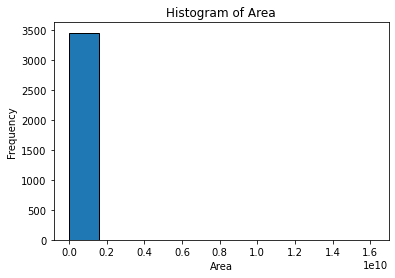

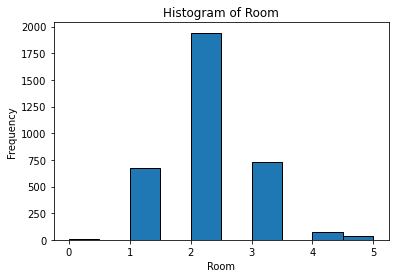

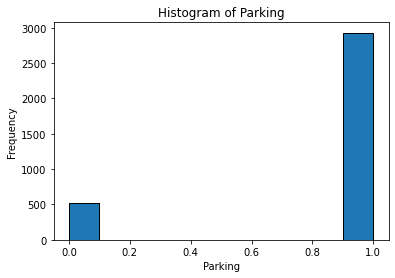

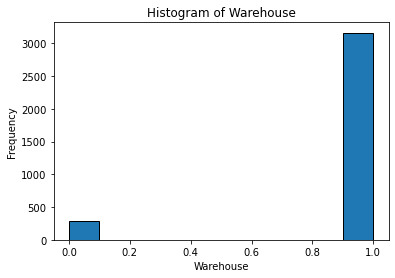

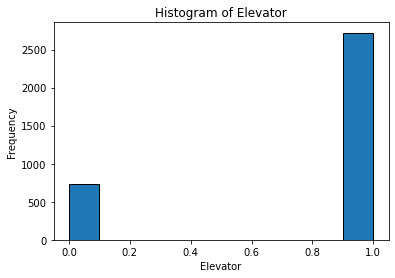

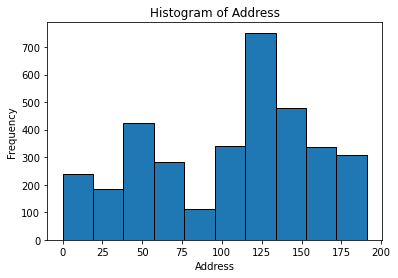

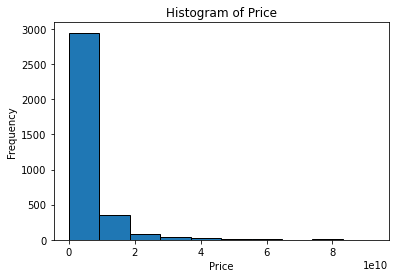

In [11]:
for column in df.columns:
    plt.figure()
    df[column].plot(kind='hist', edgecolor='black', bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pre-processing 2: Removing Outliers

In [12]:
# Histogram of 'Room' shows some houses with 0 Room
# Drop records with 0 room 
noRoom_Indices = df[df['Room'] == 0].index
df.drop(noRoom_Indices, inplace=True)

In [13]:
# Histogram of 'Area' shows some exceptionally large values
# Drop records with area > threshold 
top10_areas = df['Area'].nlargest(10) # find large values
top10_areas

709     16160000000
1604     8400000000
570      3310000000
2802     2550000000
2171           3600
807            1000
1694            929
1974            900
573             863
831             750
Name: Area, dtype: int64

In [14]:
area_threshold = 1000
outlier_Indices = df[df['Area'] > area_threshold].index
df.drop(outlier_Indices, inplace=True)

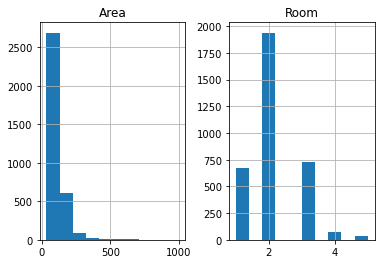

In [15]:
# histogram of 'Area' and "Room" after modifications
viz = df[['Area','Room']]
viz.hist()
plt.show()

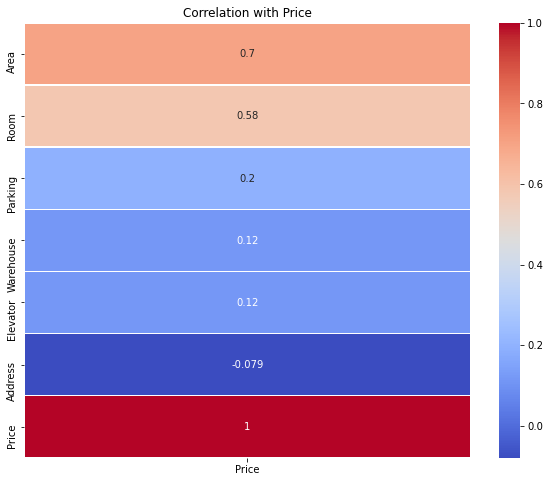

In [16]:
# Plot the correlation matrix 
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Price')
plt.show()

In [17]:
# The 'correlation = -0.079' for 'Address' may not be accurate since we know that 'Address' strongly influences the price.
# We adjust the labeling so that addresses with higher prices are labeled as larger integers.

In [18]:
# First, we introduce a new variable 'price per area.'
df['price_per_area'] = df['Price'] / df['Area'] # a new column for df

# Then, we compute the average price per area for each unique address.
average_price_per_area = df.groupby('Address')['price_per_area'].mean().sort_values()

address_mapping = {address_code: i for i, address_code in enumerate(average_price_per_area.index)}

df['Address'] = df['Address'].map(address_mapping)

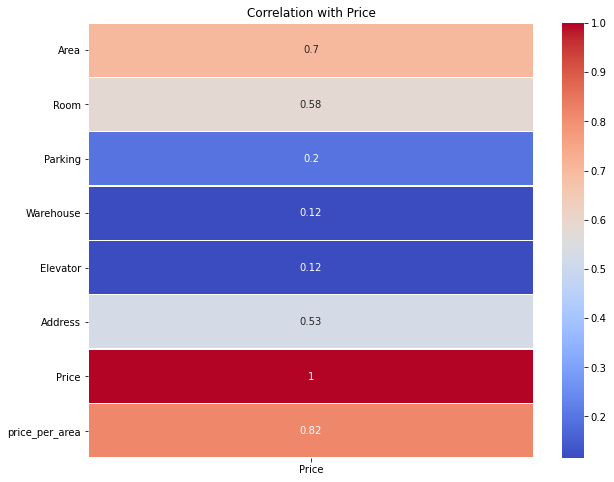

In [19]:
# Now we check again the correlations

# Plot the correlation matrix 
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Price')
plt.show()

In [20]:
# The 'correlation = 0.53' for 'Address' is now acceptable after adjusting label assignments

In [21]:
# creating a copy
df_org = df.copy()

In [22]:
# summarize the data
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,price_per_area
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3.441000e+03,3.441000e+03
mean,107.174659,2.087184,0.849462,0.916303,0.789015,108.318803,5.368813e+09,4.132835e+07
std,70.656741,0.752871,0.357650,0.276973,0.408067,54.709309,8.043872e+09,3.162989e+07
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,2.250000e+04
25%,69.000000,2.000000,1.000000,1.000000,1.000000,71.000000,1.440000e+09,2.000000e+07
50%,90.000000,2.000000,1.000000,1.000000,1.000000,117.000000,2.900000e+09,3.476190e+07
75%,120.000000,2.000000,1.000000,1.000000,1.000000,157.000000,6.000000e+09,5.500000e+07
max,1000.000000,5.000000,1.000000,1.000000,1.000000,191.000000,9.240000e+10,4.166667e+08


In [23]:
# Removing outliers using IQR method

for addr in range(192): # We have 192 unique addresses
    df_addr = df[df['Address'] == addr].copy() # Extracting a DataFrame for a specific address
    Q1 = df_addr['price_per_area'].quantile(0.25)
    Q3 = df_addr['price_per_area'].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
    df.drop(outlier_Inds, inplace=True)

<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataF

<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataF

<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataF

<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataF

<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_Inds = df_addr[(df_addr['price_per_area'] < lower_bound) | (df['price_per_area'] > upper_bound)].index
<ipython-input-23-3d6720bad1c1>:11: UserWarning: Boolean Series key will be reindexed to match DataF

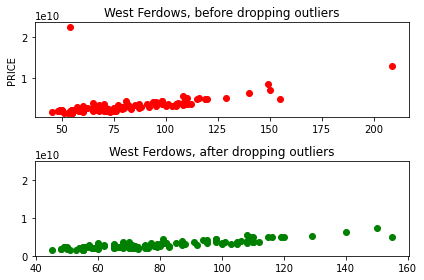

In [24]:
# Effect of dropping outliers using IQR method on 3 example Addresses

df_org_West = df_org[df_org['Address'] == 129] # 129: West Ferdows
plt.subplot(2,1,1)
plt.scatter(df_org_West.Area, df_org_West.Price, color = 'red')
plt.ylabel("PRICE")
plt.title("West Ferdows, before dropping outliers")

df_West = df[df['Address'] == 129] # 129: West Ferdows
plt.subplot(2,1,2)
plt.scatter(df_West.Area, df_West.Price, color = 'green')
plt.title("West Ferdows, after dropping outliers")
plt.ylim(0, 2.5e10)
plt.tight_layout()
plt.show()

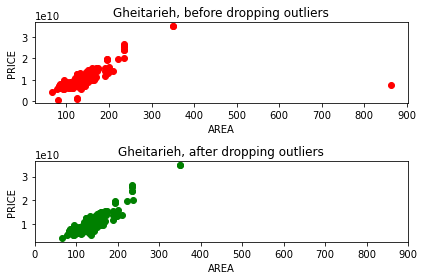

In [25]:
df_org_Gheitarieh = df_org[df_org['Address'] == 175] # 175: Gheitarieh
plt.subplot(2,1,1)
plt.scatter(df_org_Gheitarieh.Area, df_org_Gheitarieh.Price, color = 'red')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.title("Gheitarieh, before dropping outliers")

df_Gheitarieh = df[df['Address'] == 175] # 175: Gheitarieh
plt.subplot(2,1,2)
plt.scatter(df_Gheitarieh.Area, df_Gheitarieh.Price, color = 'green')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.title("Gheitarieh, after dropping outliers")
plt.xlim(0, 900)
plt.tight_layout()
plt.show()

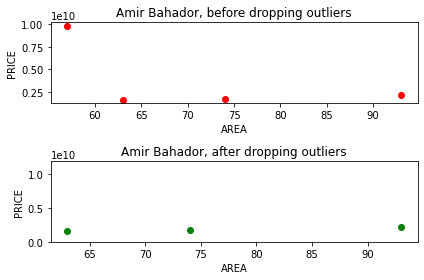

In [26]:
df_org_AmirBahador = df_org[df_org['Address'] == 163] # 163: Amir Bahador
plt.subplot(2,1,1)
plt.scatter(df_org_AmirBahador.Area, df_org_AmirBahador.Price, color = 'red')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.title("Amir Bahador, before dropping outliers")

df_AmirBahador = df[df['Address'] == 163] # 163: Amir Bahador
plt.subplot(2,1,2)
plt.scatter(df_AmirBahador.Area, df_AmirBahador.Price, color = 'green')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.title("Amir Bahador, after dropping outliers")
plt.ylim(0, 1.2e10)
plt.tight_layout()
plt.show()

# Multi-linear regression 

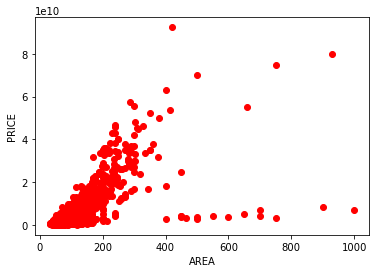

In [27]:
# plot price against area (for all addresses)
plt.scatter(df.Area, df.Price, color = 'red')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.show()

In [28]:
# plot price against area for a specific address
top_addresses = df['Address'].value_counts().head(5) # most common addresses
top_addresses

134    159
129    141
12     139
175    136
112    126
Name: Address, dtype: int64

In [29]:
top_addresses.index

Int64Index([134, 129, 12, 175, 112], dtype='int64')

In [30]:
list(le.inverse_transform(top_addresses.index))

['Rudhen', 'Ray - Montazeri', 'Amirieh', 'Vahidiyeh', 'Ozgol']

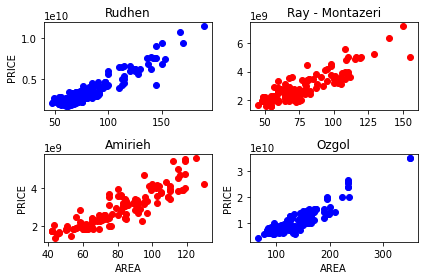

In [31]:
# plot price against area for 4 most frequent addresses

df_a = df[df['Address'] == 134] # 134: Rudhen
plt.subplot(2,2,1)
plt.scatter(df_a.Area, df_a.Price, color = 'blue')
plt.ylabel("PRICE")
plt.title("Rudhen")

df_a = df[df['Address'] == 129] # 129: Ray - Montazeri
plt.subplot(2,2,2)
plt.scatter(df_a.Area, df_a.Price, color = 'red')
plt.title("Ray - Montazeri")

df_a = df[df['Address'] == 112] # 112: Amirieh
plt.subplot(2,2,3)
plt.scatter(df_a.Area, df_a.Price, color = 'red')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.title("Amirieh")

df_a = df[df['Address'] == 175] # 175: Ozgol
plt.subplot(2,2,4)
plt.scatter(df_a.Area, df_a.Price, color = 'blue')
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.title("Ozgol")
plt.tight_layout()
plt.show()

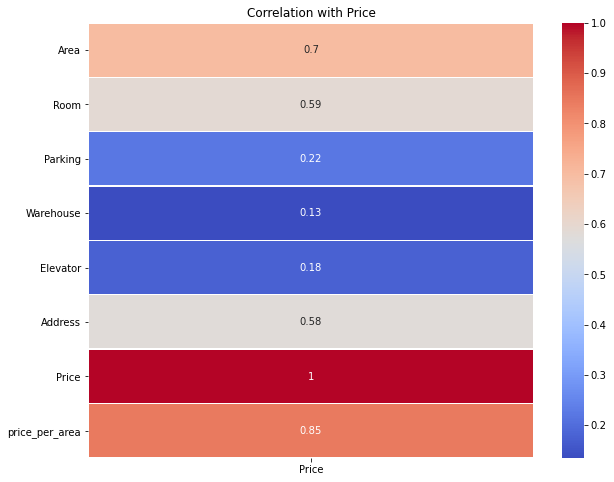

In [32]:
# First, we plot the correlations and choose the most correlated features with the Price
import seaborn as sns
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Price')
plt.show()

In [33]:
# It seems that the best combination of features would be [Area, Address, Room]

In [34]:
# from sklearn import linear_model
from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import explained_variance_score


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [35]:
X = df[['Area', 'Elevator', 'Room', 'Address']]
y = df['Price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
numeric_features = ['Area']
categorical_features = ['Elevator', 'Room', 'Address']

In [38]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# A pipeline is a sequence of data processing components (transformers) that are chained together...
# such that the output of one component is the input of the next. 
# It's a way to automate a machine learning workflow, including data preprocessing and model fitting.

In [39]:

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with the preprocessor and the GradientBoostingRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Elevator', 'Room',
                                                   'Address'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [41]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_hat))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )
# print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

Mean Squared Error: 8.057343383303784e+18
Root Mean Squared Error: 2838545998.10
R2-score: 0.83


In [42]:
# # X: [Area, Address]       Y: Price

# regr = linear_model.LinearRegression()

# x_train = np.asanyarray(train[['Area','Address']])
# y_train = np.asanyarray(train[['Price']])

# regr.fit (x_train, y_train)

# print ('Coefficients: ', regr.coef_)

# y_hat= regr.predict(test[['Area','Address']])

# x_test = np.asanyarray(test[['Area','Address']])
# y_test = np.asanyarray(test[['Price']])


# print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_hat))
# print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_hat)))
# print("R2-score: %.2f" % r2_score(y_test , y_hat) )
# print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))